In [2]:
import pandas as pd
from glob import glob
import seaborn as sns
from IPython.display import Image
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Play with Roni's swarmplot line


In [ ]:
data_to_plot = pd.melt(merged,id_vars=['participant','group'],
                    value_vars=['ME_first_reach_error mean pros','ME_first_reach_error mean intact'])
sns.boxplot(x="group", y="value", hue='variable', data=data_to_plot
            ,width=0.3,dodge=0.4)
ax = sns.swarmplot(x="group", y="value", hue='variable', data=data_to_plot,
             dodge=True,edgecolor='white',linewidth=0.2)

## Bilateral Occipitotemporal Cortex (top 100 Voxels in each hemisphere)

### Approach 1. Using the RSA performed on all 24 conditions. Create a dataframe from the L & R LOTC values, each already averaged down from the 24x24 to a 3x3 (in matlab)

In [23]:
#LLOTC
llotc = pd.DataFrame()
for filename in glob('LOTC/LLOTC/top100hemi/rsa_pilot_inmidsp_newmask/distance_matrices/sub-????_LLOTC_3x3.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with LLOTC
    llotc_df=df.iloc[:]
    #Saving data in group level df
    llotc = llotc.append([[subj,*llotc_df]],sort=False)
llotc.columns = ['subj','L_hand-hand','L_hand-tool','L_tool-tool','L_hand-tongs','L_tool-tongs','L_tongs-tongs']
llotc = llotc.sort_values(by =['subj'])
#RLOTC
rlotc = pd.DataFrame()   
for filename in glob('LOTC/RLOTC/top100hemi/rsa_pilot_inmidsp_newmask/distance_matrices/sub-????_RLOTC_3x3.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with RLOTC
    rlotc_df=df.iloc[:]
    #Saving data in group level df
    rlotc = rlotc.append([[subj,*rlotc_df]],sort=False)  
rlotc.columns = ['subj','R_hand-hand','R_hand-tool','R_tool-tool','R_hand-tongs','R_tool-tongs','R_tongs-tongs']
rlotc = rlotc.sort_values(by =['subj'])

#Concat LLOTC and RLOTC to same dataframe
df = pd.concat([llotc, rlotc], axis=1)

#Adding group column 
df['group']=llotc['subj'].str.slice(start=0,stop=1)
df['group'] = df['group'].str.replace('c','0')
df['group'] = df['group'].str.replace('l','2')
#Output to csv
df.to_csv('LOTC/results/rsa_pilot_inmidsp_newmask/rsa_pilot_inmidsp_24to3x3.csv')

### Average left and right hemispheres

In [24]:
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/rsa_pilot_inmidsp_24to3x3.csv')
#Adding columns with averaged left v. right
handtool=['L_hand-tool','R_hand-tool']
handtongs=['L_hand-tongs','R_hand-tongs']
tooltongs=['L_tool-tongs','R_tool-tongs']
handhand=['L_hand-hand','R_hand-hand']
tooltool=['L_tool-tool','R_tool-tool']
tongstongs=['L_tongs-tongs','R_tongs-tongs']

df['hand-tool'] = mean(df[handtool].values,axis=1)
df['hand-tongs'] = mean(df[handtongs].values,axis=1)
df['tool-tongs'] = mean(df[tooltongs].values,axis=1)
df['hand-hand'] = mean(df[handhand].values,axis=1)
df['tool-tool'] = mean(df[tooltool].values,axis=1)
df['tongs-tongs'] = mean(df[tongstongs].values,axis=1)

df.set_index('subj')
df.to_csv('LOTC/results/rsa_pilot_inmidsp_newmask/biLOTC_24to3x3.csv')

([<matplotlib.axis.XTick at 0x1a219d45f8>,
 <a list of 2 Text xticklabel objects>)

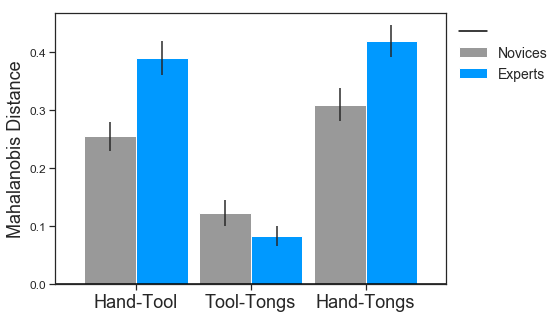

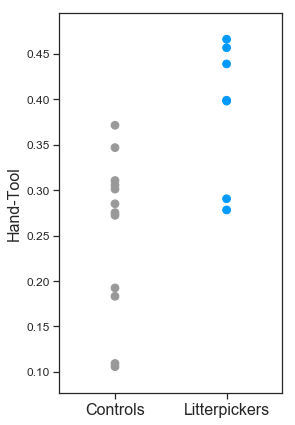

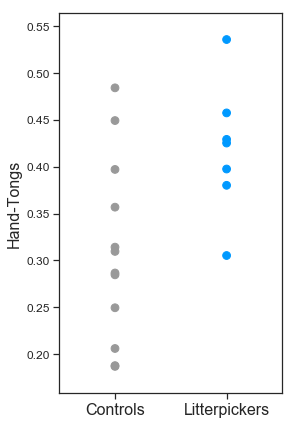

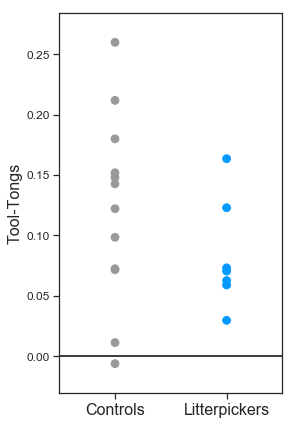

In [26]:
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/biLOTC_24to3x3.csv')
tools= ['hand-tool','tool-tongs','hand-tongs']
color = [[.6,.6,.6],[0,.6,1]]
color2 = [[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],
          [0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1]]
df.groupby('group')[tools].mean().T.plot.bar(yerr=df.groupby('group')[tools].sem().T,figsize=(7,5),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Hand-Tool','Tool-Tongs','Hand-Tongs'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Novices','Experts'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))

df.plot(kind='scatter', x = 'group', y = 'hand-tool', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tool',fontsize=16)
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

df.plot(kind='scatter', x = 'group', y = 'hand-tongs', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tongs',fontsize=16)
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

df.plot(kind='scatter', x = 'group', y = 'tool-tongs', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Tool-Tongs',fontsize=16)
plt.axhline(y=0, color='black', linestyle='-')
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


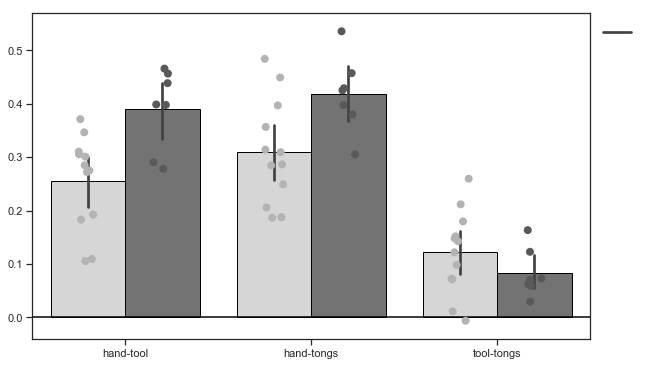

In [27]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/biLOTC_24to3x3_final_seaborn.csv')
color = [[.84,.84,.84],[.45,.45,.45]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35]]
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='dissimilarity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='group',
           edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='dissimilarity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group', s=8)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('LOTC/results/rsa_pilot_inmidsp_newmask/fig1E_currBiol.png', bbox_inches = "tight", dpi=1000)

### Distances within-category hand-hand, litterpicker-litterpicker, tongs-tongs

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


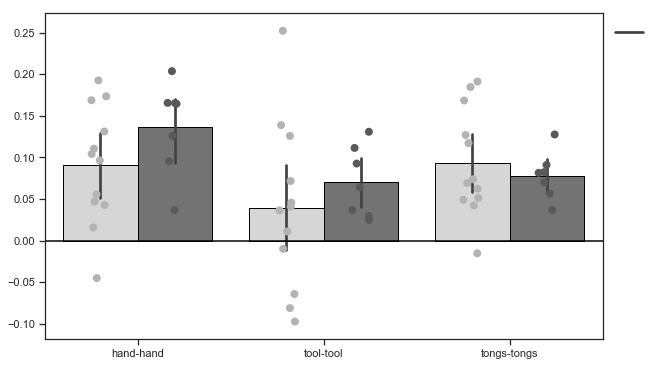

In [55]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/biLOTC_24to3x3_final_within-condition_seaborn.csv')
color = [[.84,.84,.84],[.45,.45,.45]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35]]
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='dissimilarity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='group',
           edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='dissimilarity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group', s=8)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('LOTC/results/rsa_pilot_inmidsp_newmask/within-category.png', bbox_inches = "tight", dpi=1000)

### Approach 2. Create dataframe with left and right LOTC values for each condition in the 3x3matrix

In [46]:
#LLOTC
llotc = pd.DataFrame()
for filename in glob('LOTC/LLOTC/top100hemi/contrast3_inmidsp_newmask/distance_matrices/sub-????_LLOTC_3x3.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with LLOTC
    llotc_df=df.iloc[:]
    #Saving data in group level df
    llotc = llotc.append([[subj,*llotc_df]],sort=False)
llotc.columns = ['subj','L_hand-tool','L_hand-tongs','L_tool-tongs']
llotc = llotc.sort_values(by =['subj'])
#RLOTC
rlotc = pd.DataFrame()   
for filename in glob('LOTC/RLOTC/top100hemi/contrast3_inmidsp_newmask/distance_matrices/sub-????_RLOTC_3x3.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with RLOTC
    rlotc_df=df.iloc[:]
    #Saving data in group level df
    rlotc = rlotc.append([[subj,*rlotc_df]],sort=False)  
rlotc.columns = ['subj','R_hand-tool','R_hand-tongs','R_tool-tongs']
rlotc = rlotc.sort_values(by =['subj'])

#Concat LLOTC and RLOTC to same dataframe
df = pd.concat([llotc, rlotc], axis=1)

#Adding group column 
df['group']=llotc['subj'].str.slice(start=0,stop=1)
df['group'] = df['group'].str.replace('c','0')
df['group'] = df['group'].str.replace('l','2')
#Output to csv
df.to_csv('LOTC/results/contrast3_inmidsp_newmask/biLOTC_3x3.csv')

#### Average L & R

In [48]:
df = pd.read_csv('LOTC/results/contrast3_inmidsp_newmask/biLOTC_3x3.csv')
#Adding columns with averaged left v. right
handtool=['L_hand-tool','R_hand-tool']
handtongs=['L_hand-tongs','R_hand-tongs']
tooltongs=['L_tool-tongs','R_tool-tongs']
df['hand-tool'] = mean(df[handtool].values,axis=1)
df['hand-tongs']= mean(df[handtongs].values,axis=1)
df['tool-tongs'] = mean(df[tooltongs].values,axis=1)
df.set_index('subj')
df.to_csv('LOTC/results/contrast3_inmidsp_newmask/biLOTC_3x3_final.csv')

([<matplotlib.axis.XTick at 0x1a25879240>,
 <a list of 2 Text xticklabel objects>)

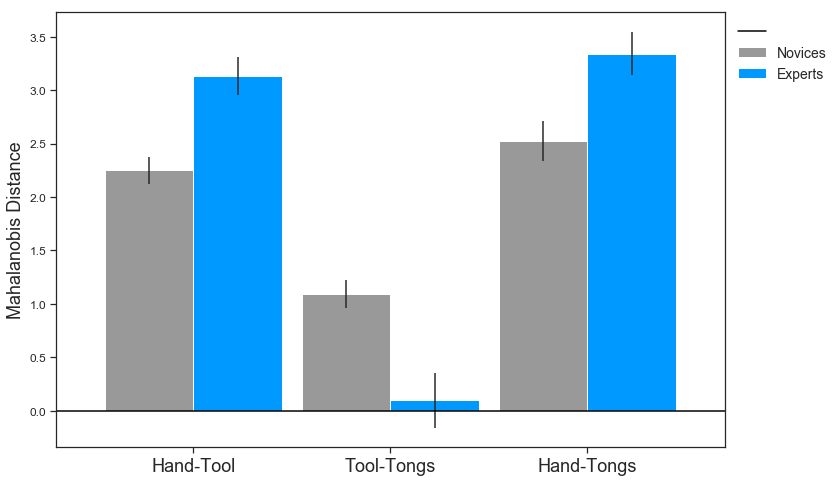

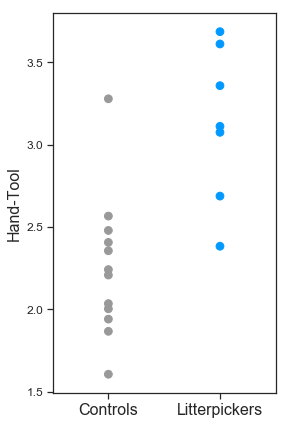

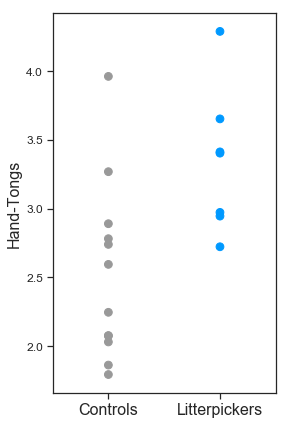

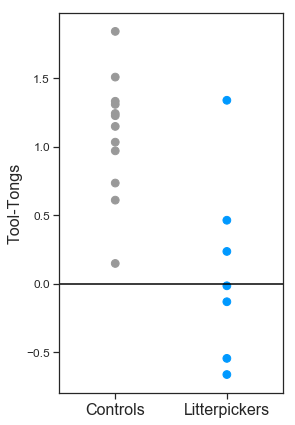

In [49]:
df = pd.read_csv('LOTC/results/contrast3_inmidsp_newmask/biLOTC_3x3_final.csv')
tools= ['hand-tool','tool-tongs','hand-tongs']
color = [[.6,.6,.6],[0,.6,1]]
color2 = [[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],
          [0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1]]
df.groupby('group')[tools].mean().T.plot.bar(yerr=df.groupby('group')[tools].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Hand-Tool','Tool-Tongs','Hand-Tongs'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Novices','Experts'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))

df.plot(kind='scatter', x = 'group', y = 'hand-tool', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tool',fontsize=16)
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

df.plot(kind='scatter', x = 'group', y = 'hand-tongs', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tongs',fontsize=16)
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

df.plot(kind='scatter', x = 'group', y = 'tool-tongs', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Tool-Tongs',fontsize=16)
plt.axhline(y=0, color='black', linestyle='-')
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


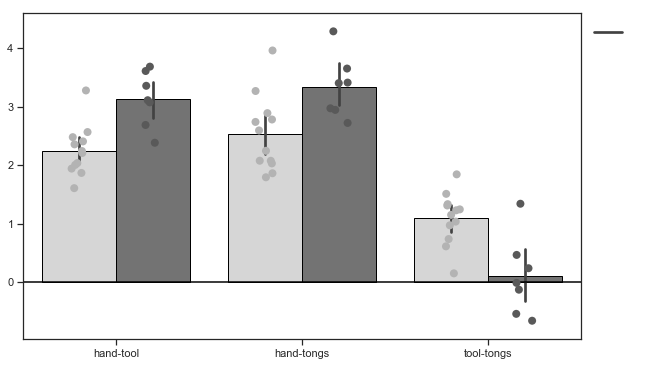

In [53]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('LOTC/results/contrast3_inmidsp_newmask/biLOTC_3x3_final_seaborn.csv')
color = [[.84,.84,.84],[.45,.45,.45]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35]]
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='dissimilarity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='group',
           edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='dissimilarity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group', s=8)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('LOTC/results/contrast3_inmidsp_newmask/fig1E_currBiol.png', bbox_inches = "tight", dpi=1000)

### Exploring the two-way interaction between hemisphere and effector-type

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


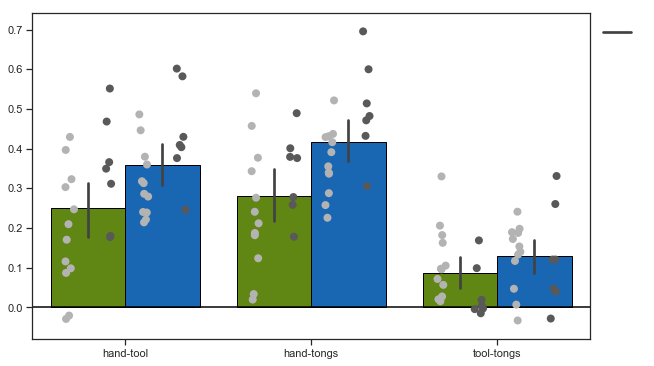

In [93]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/effectors*hemi_seaborn.csv')
color = [[.4,.6,0],[0,.4,.8]]
#color2 = [[.9,.1,.1],[0,.3,1]]
#color2 = [[.6,.1,.1],[.9,.1,0],[0,0,.4],[.1,.1,1]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35],[0.7, 0.7, 0.7],[.35,.35,.35]]


sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='dissimilarity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='hemisphere',
           edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='dissimilarity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='hemisphere2', s=8)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('LOTC/results/rsa_pilot_inmidsp_newmask/effectors*hemi_figure.png', bbox_inches = "tight", dpi=1000)

## Univariate Results - hemisphere * effector-type

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


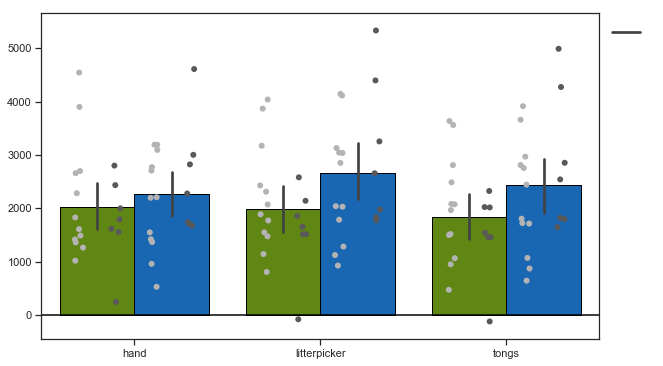

In [96]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('LOTC/univariate/univariate_hemi-effectors_seaborn.csv')
color = [[.4,.6,0],[0,.4,.8]]
#color2 = [[.9,.1,.1],[0,.3,1]]
#color2 = [[.6,.1,.1],[.9,.1,0],[0,0,.4],[.1,.1,1]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35],[0.7, 0.7, 0.7],[.35,.35,.35]]

sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='activity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='hemisphere',
                edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='activity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='hemisphere2',
                   s=6)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('LOTC/univariate/supp_results_univariate_figure.png', bbox_inches = "tight", dpi=1000)

### Laterality with new mask

In [6]:
#LLOTC
llotc = pd.DataFrame()
for filename in glob('LOTC/LLOTC/top100hemi/contrast6_laterality/distance_matrices/sub-????_LLOTC_6x6.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with LLOTC
    llotc_df=df.iloc[:]
    #Saving data in group level df
    llotc = llotc.append([[subj,*llotc_df]],sort=False)
llotc.columns = ['subj','LHemi_Lhand-Rhand','LHemi_Lhand-Ltool','LHemi_Ltool-Rtool','LHemi_Lhand-Ltongs','LHemi_Lhand-Rtongs','LHemi_Rhand-Ltool','LHemi_Rhand-Rtool','LHemi_Rhand-Ltongs','LHemi_Rhand-Rtongs','LHemi_Ltool-Rtool','LHemi_Ltool-Ltongs','LHemi_Ltool-Rtongs','LHemi_Rtool-Ltongs','LHemi_Rtool-Rtongs','LHemi_Ltongs-Rtongs']
llotc = llotc.sort_values(by =['subj'])

#RLOTC
rlotc = pd.DataFrame()   
for filename in glob('LOTC/RLOTC/top100hemi/contrast6_laterality/distance_matrices/sub-????_RLOTC_6x6.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with RLOTC
    rlotc_df=df.iloc[:]
    #Saving data in group level df
    rlotc = rlotc.append([[subj,*rlotc_df]],sort=False)  
rlotc.columns = ['subj','RHemi_Lhand-Rhand','RHemi_Lhand-Ltool','RHemi_Ltool-Rtool','RHemi_Lhand-Ltongs','RHemi_Lhand-Rtongs','RHemi_Rhand-Ltool','RHemi_Rhand-Rtool','RHemi_Rhand-Ltongs','RHemi_Rhand-Rtongs','RHemi_Ltool-Rtool','RHemi_Ltool-Ltongs','RHemi_Ltool-Rtongs','RHemi_Rtool-Ltongs','RHemi_Rtool-Rtongs','RHemi_Ltongs-Rtongs']
rlotc = rlotc.sort_values(by =['subj'])

#Concat LLOTC and RLOTC to same dataframe
df = pd.concat([llotc, rlotc], axis=1)

#Adding group column 
df['group']=llotc['subj'].str.slice(start=0,stop=1)
df['group'] = df['group'].str.replace('c','0')
df['group'] = df['group'].str.replace('l','2')
#Output to csv
df.to_csv('LOTC/results/contrast6_laterality/contrast6_biLOTC_laterality.csv')

### Context - averaged the 24x24 down into a 6x6 L and 6x6 R and averaged the two

In [10]:
#LLOTC
llotc = pd.DataFrame()
for filename in glob('LOTC/LLOTC/top100hemi/context_6x6/sub-????_LLOTC_6x6.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with LLOTC
    llotc_df=df.iloc[:]
    #Saving data in group level df
    llotc = llotc.append([[subj,*llotc_df]],sort=False)
llotc.columns = ['subj','LHemi_TC_hand-TC_hand','LHemi_TC_hand-HC_hand','LHemi_HC_hand-HC_hand','LHemi_TC_hand-TC_tool','LHemi_HC_hand-TC_tool','LHemi_TC_tool-TC_tool','LHemi_TC_hand-HC_tool','LHemi_HC_hand-HC_tool','LHemi_TC_tool-HC_tool','LHemi_HC_tool-HC_tool','LHemi_TC_hand-TC_tongs','LHemi_HC_hand-TC_tongs','LHemi_TC_tool-TC_tongs','LHemi_HC_tool-TC_tongs','LHemi_TC_tongs-TC_tongs','LHemi_TC_hand-HC_tongs','LHemi_HC_hand-HC_tongs','LHemi_TC_tool-HC_tongs','LHemi_HC_tool-HC_tongs','LHemi_TC_tongs-TC_tongs','LHemi_HC_tongs-HC_tongs']
llotc = llotc.sort_values(by =['subj'])

#RLOTC
rlotc = pd.DataFrame()   
for filename in glob('LOTC/RLOTC/top100hemi/context_6x6/sub-????_RLOTC_6x6.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with RLOTC
    rlotc_df=df.iloc[:]
    #Saving data in group level df
    rlotc = rlotc.append([[subj,*rlotc_df]],sort=False)  
rlotc.columns = ['subj','RHemi_TC_hand-TC_hand','RHemi_TC_hand-HC_hand','RHemi_HC_hand-HC_hand','RHemi_TC_hand-TC_tool','RHemi_HC_hand-TC_tool','RHemi_TC_tool-TC_tool','RHemi_TC_hand-HC_tool','RHemi_HC_hand-HC_tool','RHemi_TC_tool-HC_tool','RHemi_HC_tool-HC_tool','RHemi_TC_hand-TC_tongs','RHemi_HC_hand-TC_tongs','RHemi_TC_tool-TC_tongs','RHemi_HC_tool-TC_tongs','RHemi_TC_tongs-TC_tongs','RHemi_TC_hand-HC_tongs','RHemi_HC_hand-HC_tongs','RHemi_TC_tool-HC_tongs','RHemi_HC_tool-HC_tongs','RHemi_TC_tongs-TC_tongs','RHemi_HC_tongs-HC_tongs']
rlotc = rlotc.sort_values(by =['subj'])

#Concat LLOTC and RLOTC to same dataframe
df = pd.concat([llotc, rlotc], axis=1)

#Adding group column 
df['group']=llotc['subj'].str.slice(start=0,stop=1)
df['group'] = df['group'].str.replace('c','0')
df['group'] = df['group'].str.replace('l','2')
#Output to csv
df
df.to_csv('LOTC/results/rsa_pilot_inmidsp_newmask/context_6x6/context_biLOTC.csv')

In [11]:
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/context_6x6/context_biLOTC.csv')
#Adding columns with averaged left v. right
HC_handtool=['LHemi_HC_hand-HC_tool','RHemi_HC_hand-HC_tool']
TC_handtool=['LHemi_TC_hand-TC_tool','RHemi_TC_hand-TC_tool']
HC_handtongs=['LHemi_HC_hand-HC_tongs','RHemi_HC_hand-HC_tongs']
TC_handtongs=['LHemi_TC_hand-TC_tongs','RHemi_TC_hand-TC_tongs']
HC_tooltongs=['LHemi_HC_tool-HC_tongs','RHemi_HC_tool-HC_tongs']
TC_tooltongs=['LHemi_TC_tool-TC_tongs','RHemi_TC_tool-TC_tongs']

df['HC_hand-tool'] = mean(df[HC_handtool].values,axis=1)
df['TC_hand-tool'] = mean(df[TC_handtool].values,axis=1)

df['HC_hand-tongs'] = mean(df[HC_handtongs].values,axis=1)
df['TC_hand-tongs'] = mean(df[TC_handtongs].values,axis=1)

df['HC_tool-tongs'] = mean(df[HC_tooltongs].values,axis=1)
df['TC_tool-tongs'] = mean(df[TC_tooltongs].values,axis=1)

df.set_index('subj')
df.to_csv('LOTC/results/rsa_pilot_inmidsp_newmask/context_6x6/context_biLOTC_FINAL.csv')
df

,Unnamed: 0,subj,LHemi_TC_hand-TC_hand,LHemi_TC_hand-HC_hand,LHemi_HC_hand-HC_hand,LHemi_TC_hand-TC_tool,LHemi_HC_hand-TC_tool,LHemi_TC_tool-TC_tool,LHemi_TC_hand-HC_tool,LHemi_HC_hand-HC_tool,...,RHemi_HC_tool-HC_tongs,RHemi_TC_tongs-TC_tongs.1,RHemi_HC_tongs-HC_tongs,group,HC_hand-tool,TC_hand-tool,HC_hand-tongs,TC_hand-tongs,HC_tool-tongs,TC_tool-tongs
0,0,co01,-0.070072,0.077496,0.088489,0.31700,0.45363,0.196720,0.043876,0.30279,...,0.121150,0.148760,0.020178,0,0.208475,0.187483,0.261305,0.233485,0.093933,0.035600
1,0,co02,0.221430,0.235030,0.075961,0.46302,0.48245,0.015455,0.556590,0.44292,...,0.058065,-0.022276,-0.043715,0,0.284030,0.251485,0.310055,0.298810,0.051799,0.182140
2,0,co03,0.147250,0.089796,0.158410,0.36301,0.39077,0.132420,0.362040,0.40301,...,0.174670,0.031416,0.153930,0,0.324155,0.238720,0.393390,0.290355,0.199120,0.020679
3,0,co04,0.160100,0.248660,0.229430,0.40856,0.44405,-0.018148,0.240980,0.34678,...,0.132390,0.064762,0.216430,0,0.293600,0.302300,0.405980,0.185011,0.094408,0.066542
4,0,co05,0.061223,0.078966,-0.020166,0.21098,0.17432,-0.016415,0.238270,0.26222,...,0.112420,0.146300,0.076607,0,0.319850,0.242895,0.246385,0.342950,0.155030,0.264025
5,0,co07,0.140440,0.053246,0.049754,0.20541,0.15808,0.005355,0.341470,0.25709,...,-0.111910,0.188910,-0.111010,0,0.159018,0.038350,0.097406,0.272585,-0.103898,0.082958
6,0,co09,0.034286,0.100630,0.155670,0.10410,0.18170,-0.045322,0.235640,0.33600,...,0.188040,0.221480,0.252460,0,0.364255,0.245520,0.434455,0.345275,0.185245,0.158322
7,0,co10,-0.095029,0.148030,0.104820,0.22519,0.28339,-0.200960,0.324350,0.31216,...,-0.080017,0.058943,-0.013367,0,0.176396,0.164085,0.183655,0.166078,-0.078590,0.015656
8,0,co11,0.009071,0.122860,0.180840,0.19132,0.26882,0.027715,0.267930,0.22814,...,0.064364,0.067090,0.011994,0,0.091879,0.080738,0.264598,0.165343,0.188502,-0.049822
9,0,co13,-0.029099,0.088518,0.066725,0.20280,0.34810,0.124700,0.353080,0.36764,...,0.140710,0.056973,0.107780,0,0.342215,0.261660,0.352245,0.238840,0.183860,0.067780


In [6]:
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/context_6x6/context_biLOTC_FINAL.csv')
df

,Unnamed: 0,Unnamed: 0.1,subj,LHemi_TC_hand-TC_hand,LHemi_TC_hand-HC_hand,LHemi_HC_hand-HC_hand,LHemi_TC_hand-TC_tool,LHemi_HC_hand-TC_tool,LHemi_TC_tool-TC_tool,LHemi_TC_hand-HC_tool,...,RHemi_HC_tool-HC_tongs,RHemi_TC_tongs-TC_tongs.1,RHemi_HC_tongs-HC_tongs,group,HC_hand-tool,TC_hand-tool,HC_hand-tongs,TC_hand-tongs,HC_tool-tongs,TC_tool-tongs
0,0,0,co01,-0.070072,0.077496,0.088489,0.31700,0.45363,0.196720,0.043876,...,0.121150,0.148760,0.020178,0,0.208475,0.187483,0.261305,0.233485,0.093933,0.035600
1,1,0,co02,0.221430,0.235030,0.075961,0.46302,0.48245,0.015455,0.556590,...,0.058065,-0.022276,-0.043715,0,0.284030,0.251485,0.310055,0.298810,0.051799,0.182140
2,2,0,co03,0.147250,0.089796,0.158410,0.36301,0.39077,0.132420,0.362040,...,0.174670,0.031416,0.153930,0,0.324155,0.238720,0.393390,0.290355,0.199120,0.020679
3,3,0,co04,0.160100,0.248660,0.229430,0.40856,0.44405,-0.018148,0.240980,...,0.132390,0.064762,0.216430,0,0.293600,0.302300,0.405980,0.185011,0.094408,0.066541
4,4,0,co05,0.061223,0.078966,-0.020166,0.21098,0.17432,-0.016415,0.238270,...,0.112420,0.146300,0.076607,0,0.319850,0.242895,0.246385,0.342950,0.155030,0.264025
5,5,0,co07,0.140440,0.053246,0.049754,0.20541,0.15808,0.005355,0.341470,...,-0.111910,0.188910,-0.111010,0,0.159018,0.038350,0.097406,0.272585,-0.103897,0.082958
6,6,0,co09,0.034286,0.100630,0.155670,0.10410,0.18170,-0.045322,0.235640,...,0.188040,0.221480,0.252460,0,0.364255,0.245520,0.434455,0.345275,0.185245,0.158322
7,7,0,co10,-0.095029,0.148030,0.104820,0.22519,0.28339,-0.200960,0.324350,...,-0.080017,0.058943,-0.013367,0,0.176396,0.164085,0.183655,0.166078,-0.078590,0.015656
8,8,0,co11,0.009071,0.122860,0.180840,0.19132,0.26882,0.027715,0.267930,...,0.064364,0.067090,0.011994,0,0.091879,0.080738,0.264598,0.165343,0.188502,-0.049822
9,9,0,co13,-0.029099,0.088518,0.066725,0.20280,0.34810,0.124700,0.353080,...,0.140710,0.056973,0.107780,0,0.342215,0.261660,0.352245,0.238840,0.183860,0.067780


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


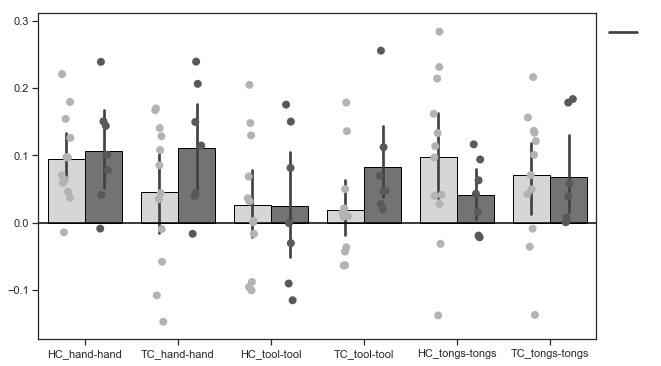

In [5]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('LOTC/results/rsa_pilot_inmidsp_newmask/context_6x6/context_biLOTC_final_seaborn.csv')
color = [[.84,.84,.84],[.45,.45,.45]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35]]

sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='dissimilarity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='group',
           edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='dissimilarity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group', s=8)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('LOTC/results/rsa_pilot_inmidsp_newmask/context_6x6/context_within-category.png', bbox_inches = "tight", dpi=1000)

## Left IPS analysis, top 100 voxels

In [4]:
#IPS
ips = pd.DataFrame()
for filename in glob('IPS/IPS_L/top100hemi/rsa_pilot_inmidsp/distance_matrices/sub-????_IPS_L_3x3.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with IPS
    ips_df=df.iloc[:]
    #Saving data in group level df
    ips = ips.append([[subj,*ips_df]],sort=False)
ips.columns = ['subj','hand-hand','hand-tool','tool-tool','hand-tongs','tool-tongs','tongs-tongs']
ips = ips.sort_values(by =['subj'])

#Adding group column 
ips['group']=ips['subj'].str.slice(start=0,stop=1)
ips['group'] = ips['group'].str.replace('c','0')
ips['group'] = ips['group'].str.replace('l','2')
#Output to csv
ips.to_csv('IPS/results/IPS_L_3x3.csv')

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


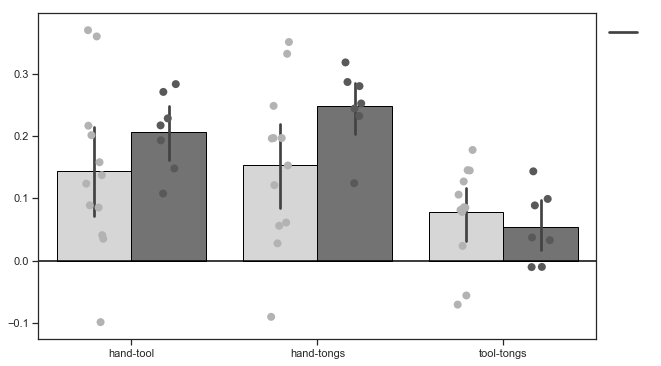

In [5]:
import seaborn as sns
%matplotlib inline
df = pd.read_csv('IPS/results/IPS_L_seaborn.csv')
color = [[.84,.84,.84],[.45,.45,.45]]
color2 =[[0.7, 0.7, 0.7],[.35,.35,.35]]
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette(color)
sns.set_style("white")
sns.set_style("ticks")
sns.barplot(y='dissimilarity', x='category', 
                 data=df, 
                 #palette="Paired", 
                 hue='group',
           edgecolor=(0,0,0))
sns.set_palette(color2)
sns.stripplot(y='dissimilarity', x='category',
                   data=df, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group', s=8)
plt.legend([''],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.ylabel('')
plt.axhline(y=0, color='black', linestyle='-')
plt.xlabel('')
plt.savefig('IPS/results/IPS_L_figure.png', bbox_inches = "tight", dpi=1000)

### old code

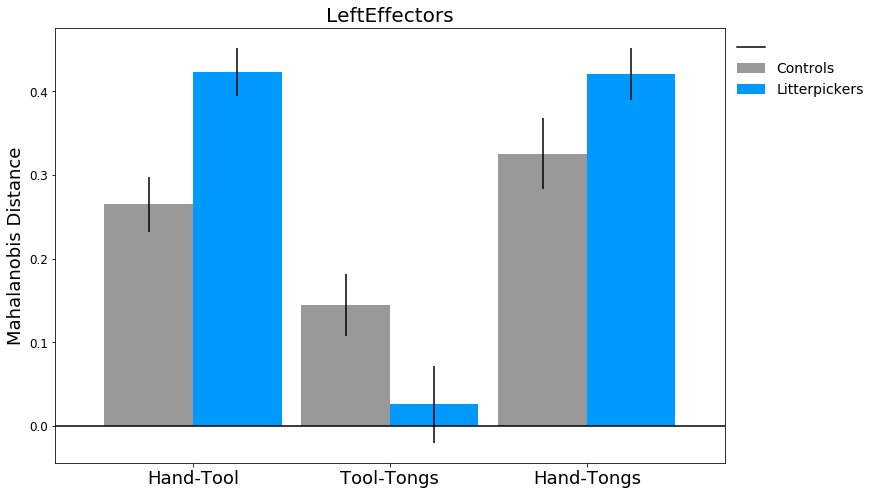

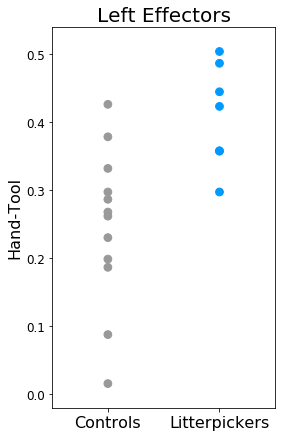

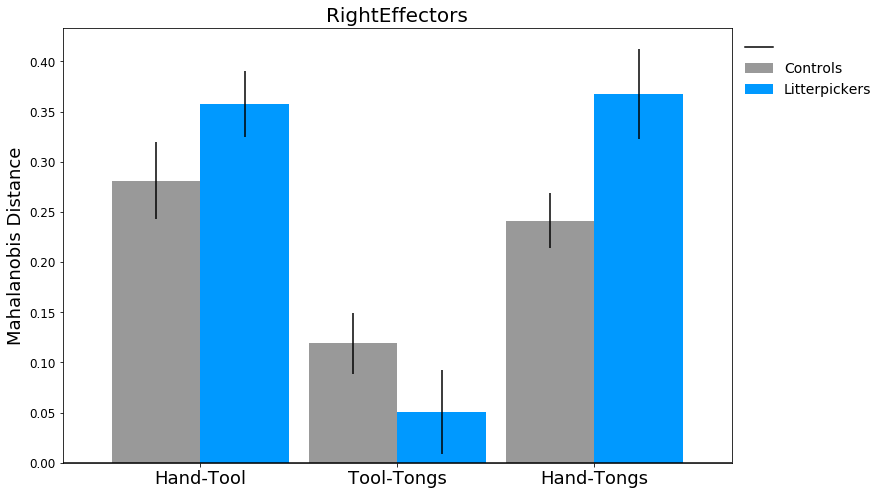

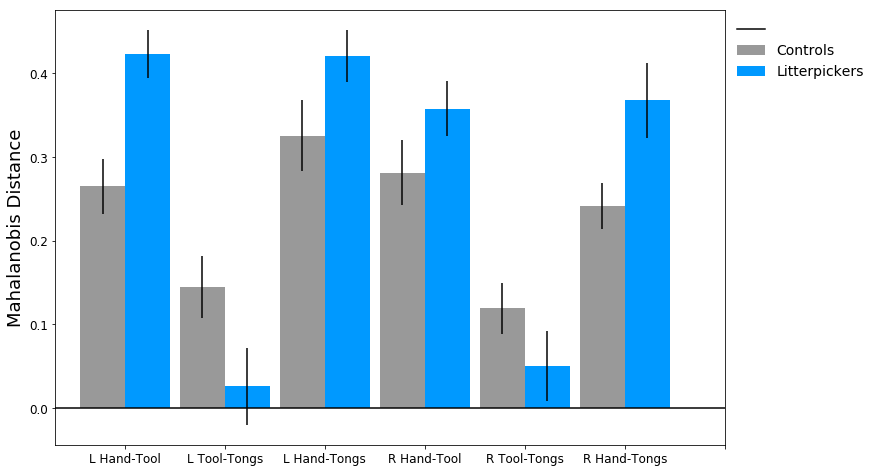

In [71]:
Ltools= ['LH-LT','LT-LUT','LH-LUT']
Rtools= ['RH-RT','RT-RUT','RH-RUT']
bitools= ['LH-LT','LT-LUT','LH-LUT','RH-RT','RT-RUT','RH-RUT']
color = [[.6,.6,.6],[0,.6,1]]
color2 = [[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],
          [0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1]]

df.groupby('group2')[Ltools].median().T.plot.bar(yerr=df.groupby('group2')[Ltools].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.title('LeftEffectors', fontsize=20)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Hand-Tool','Tool-Tongs','Hand-Tongs'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Controls','Litterpickers'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))

df.plot(kind='scatter', x = 'group2', y = 'LH-LT', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tool',fontsize=16)
plt.title ('Left Effectors', fontsize=20)
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)

df.groupby('group2')[Rtools].median().T.plot.bar(yerr=df.groupby('group2')[Rtools].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.title('RightEffectors', fontsize=20)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Hand-Tool','Tool-Tongs','Hand-Tongs'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Controls','Litterpickers'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))

df.groupby('group2')[bitools].median().T.plot.bar(yerr=df.groupby('group2')[bitools].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2,3,4,5,6],['L Hand-Tool','L Tool-Tongs','L Hand-Tongs','R Hand-Tool','R Tool-Tongs','R Hand-Tongs'],rotation='horizontal', fontsize=12)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Controls','Litterpickers'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))

## Top 250 Voxels

In [19]:
#LLOTC
llotc = pd.DataFrame()
for filename in glob('LOTC/LLOTC/top250hemi/contrast4/distance_matrices/sub-????_LOTC_L.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with LLOTC
    llotc_df=df.iloc[:]
    #Saving data in group level df
    llotc = llotc.append([[subj,*llotc_df]],sort=False)
llotc.columns = ['subj','L_hand-pros','L_hand-tool','L_hand-tongs','L_pros-tool','L_pros-tongs','L_tool-tongs']
llotc = llotc.sort_values(by =['subj'])
#RLOTC
rlotc = pd.DataFrame()   
for filename in glob('LOTC/RLOTC/top250hemi/contrast4/distance_matrices/sub-????_LOTC_R.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with RLOTC
    rlotc_df=df.iloc[:]
    #Saving data in group level df
    rlotc = rlotc.append([[subj,*rlotc_df]],sort=False)  
rlotc.columns = ['subj','R_hand-pros','R_hand-tool','R_hand-tongs','R_pros-tool','R_pros-tongs','R_tool-tongs']
rlotc = rlotc.sort_values(by =['subj'])

#Concat LLOTC and RLOTC to same dataframe
df = pd.concat([llotc, rlotc], axis=1)

#Adding group column 
df['group']=llotc['subj'].str.slice(start=0,stop=1)
df['group'] = df['group'].str.replace('c','0')
df['group'] = df['group'].str.replace('l','2')
df['group'] = df['group'].str.replace('a','1')

df.to_csv('LOTC/results/LOTC_matrix_top250hemi.csv')
#Output to csv
df

,subj,L_hand-pros,L_hand-tool,L_hand-tongs,L_pros-tool,L_pros-tongs,L_tool-tongs,subj,R_hand-pros,R_hand-tool,R_hand-tongs,R_pros-tool,R_pros-tongs,R_tool-tongs,group
0,aa01,-0.33553,1.3498,1.5285,0.66791,0.96914,-0.62624,aa01,1.1524,1.9076,1.5103,0.80464,0.65793,-0.04839,1
0,aa02,1.2203,2.4452,2.1956,1.5122,1.7591,0.40484,aa02,2.1957,2.7641,2.7894,2.115,2.3424,0.4111,1
0,ac01,0.95248,3.0787,4.2289,2.3508,3.4907,1.4761,ac01,1.7242,3.0565,4.25,1.9994,3.312,1.8832,1
0,ac02,2.3503,3.6138,3.9482,1.9351,3.0002,1.1923,ac02,2.4005,1.9781,1.704,1.9953,2.6846,1.5518,1
0,co01,1.1165,2.0253,1.3614,1.5484,1.8502,1.0799,co01,0.48156,0.94818,1.6324,1.5742,2.0854,0.77774,0
0,co02,1.2886,2.7392,2.7423,1.5402,2.281,0.86576,co02,0.71497,1.5628,1.7375,1.7993,2.2989,0.96189,0
0,co03,1.6408,2.0867,3.123,1.602,3.0562,1.1829,co03,0.89687,2.1595,1.9585,1.9373,2.2797,1.5967,0
0,co04,1.2917,2.4722,2.3369,2.3867,2.4806,0.14776,co04,-0.20021,1.4749,1.4566,1.3341,1.608,-0.28512,0
0,co05,1.1344,1.4889,1.6471,0.97002,1.3339,0.67678,co05,1.5883,2.4759,2.1343,1.6804,1.4917,1.6204,0
0,co07,0.46241,2.2931,2.9424,1.1818,2.7553,0.18829,co07,-0.1096,1.4878,0.9827,1.3649,-0.48796,1.4026,0


In [21]:
df=pd.read_csv('LOTC/results/LOTC_matrix_top250hemi.csv')
df.set_index('subj')

#Adding columns with averaged left v. right
handpros = ['L_hand-pros','R_hand-pros']
handtool=['L_hand-tool','R_hand-tool']
handtongs=['L_hand-tongs','R_hand-tongs']
prostool=['L_pros-tool','R_pros-tool']
prostongs=['L_pros-tongs','R_pros-tongs']
tooltongs=['L_tool-tongs','R_tool-tongs']
df['hand-pros'] = mean(df[handpros].values,axis=1)
df['hand-tool'] = mean(df[handtool].values,axis=1)
df['hand-tongs'] = mean(df[handtongs].values,axis=1)
df['pros-tool'] = mean(df[prostool].values,axis=1)
df['pros-tongs'] = mean(df[prostongs].values,axis=1)
df['tool-tongs'] = mean(df[tooltongs].values,axis=1)

df.to_csv('LOTC/results/LOTC_matrix_top250hemi.csv')
df

,Unnamed: 0,Unnamed: 0.1,subj,L_hand-pros,L_hand-tool,L_hand-tongs,L_pros-tool,L_pros-tongs,L_tool-tongs,subj.1,...,R_pros-tool,R_pros-tongs,R_tool-tongs,group,hand-pros,hand-tool,hand-tongs,pros-tool,pros-tongs,tool-tongs
0,0,0,aa01,-0.33553,1.3498,1.5285,0.66791,0.96914,-0.62624,aa01,...,0.80464,0.65793,-0.04839,1,0.408435,1.628700,1.51940,0.736275,0.813535,-0.337315
1,1,0,aa02,1.22030,2.4452,2.1956,1.51220,1.75910,0.40484,aa02,...,2.11500,2.34240,0.41110,1,1.708000,2.604650,2.49250,1.813600,2.050750,0.407970
2,2,0,ac01,0.95248,3.0787,4.2289,2.35080,3.49070,1.47610,ac01,...,1.99940,3.31200,1.88320,1,1.338340,3.067600,4.23945,2.175100,3.401350,1.679650
3,3,0,ac02,2.35030,3.6138,3.9482,1.93510,3.00020,1.19230,ac02,...,1.99530,2.68460,1.55180,1,2.375400,2.795950,2.82610,1.965200,2.842400,1.372050
4,4,0,co01,1.11650,2.0253,1.3614,1.54840,1.85020,1.07990,co01,...,1.57420,2.08540,0.77774,0,0.799030,1.486740,1.49690,1.561300,1.967800,0.928820
5,5,0,co02,1.28860,2.7392,2.7423,1.54020,2.28100,0.86576,co02,...,1.79930,2.29890,0.96189,0,1.001785,2.151000,2.23990,1.669750,2.289950,0.913825
6,6,0,co03,1.64080,2.0867,3.1230,1.60200,3.05620,1.18290,co03,...,1.93730,2.27970,1.59670,0,1.268835,2.123100,2.54075,1.769650,2.667950,1.389800
7,7,0,co04,1.29170,2.4722,2.3369,2.38670,2.48060,0.14776,co04,...,1.33410,1.60800,-0.28512,0,0.545745,1.973550,1.89675,1.860400,2.044300,-0.068680
8,8,0,co05,1.13440,1.4889,1.6471,0.97002,1.33390,0.67678,co05,...,1.68040,1.49170,1.62040,0,1.361350,1.982400,1.89070,1.325210,1.412800,1.148590
9,9,0,co07,0.46241,2.2931,2.9424,1.18180,2.75530,0.18829,co07,...,1.36490,-0.48796,1.40260,0,0.176405,1.890450,1.96255,1.273350,1.133670,0.795445


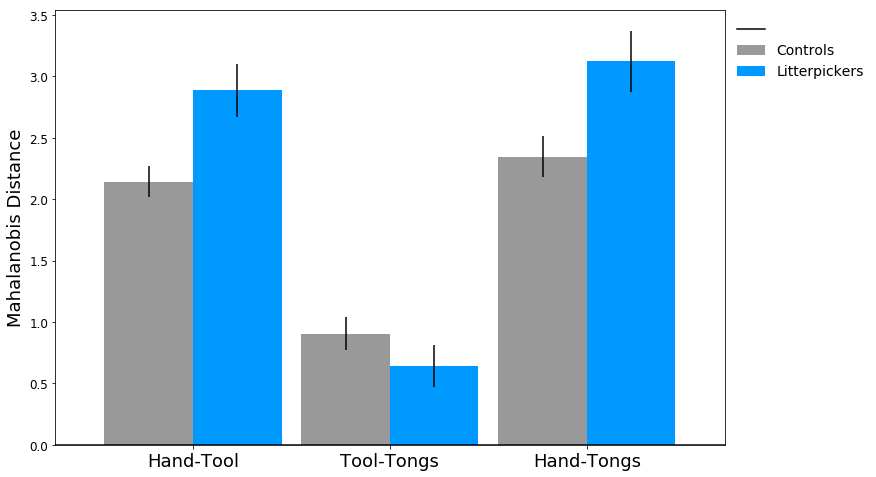

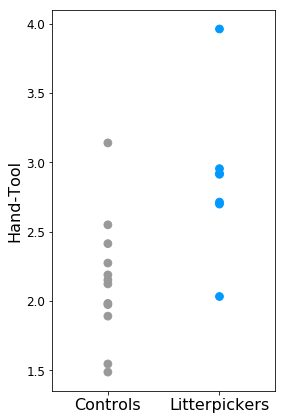

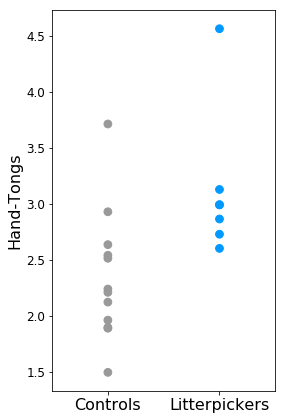

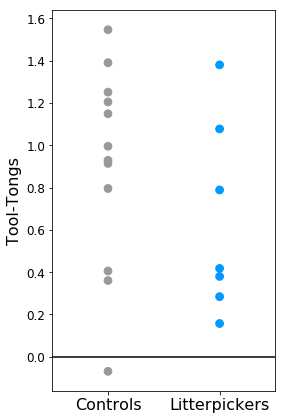

In [15]:
#added group2 column manually
df=pd.read_csv('LOTC/results/LOTC_matrix_top250hemi_revised.csv')

tools= ['hand-tool','tool-tongs','hand-tongs']
color = [[.6,.6,.6],[0,.6,1]]
color2 = [[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],
          [0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1]]

df.groupby('group2')[tools].mean().T.plot.bar(yerr=df.groupby('group2')[tools].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Hand-Tool','Tool-Tongs','Hand-Tongs'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Controls','Litterpickers'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
plt.savefig('LOTC/results/plots/litterpicker_figure_top250hemi.png', bbox_inches = "tight", dpi=1000)

df.plot(kind='scatter', x = 'group2', y = 'hand-tool', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tool',fontsize=16)
#plt.ylim((1,4.2))
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)
plt.savefig('LOTC/results/plots/hand-tool_scatter_top250hemi.png', bbox_inches = "tight", dpi=1000)

df.plot(kind='scatter', x = 'group2', y = 'hand-tongs', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tongs',fontsize=16)
#plt.ylim((1,5))
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)
plt.savefig('LOTC/results/plots/hand-tongs_scatter_top250hemi.png', bbox_inches = "tight", dpi=1000)

df.plot(kind='scatter', x = 'group2', y = 'tool-tongs', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Tool-Tongs',fontsize=16)
plt.axhline(y=0, color='black', linestyle='-')
#plt.ylim((-.5,2))
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)
plt.savefig('LOTC/results/plots/tool-tongs_scatter_top250hemi.png', bbox_inches = "tight", dpi=1000)

In [14]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

handtool_ttest = ttest_ind(*df.groupby('group2')['hand-tool'].apply(lambda x:list(x)))
tooltongs_ttest = ttest_ind(*df.groupby('group2')['tool-tongs'].apply(lambda x:list(x)))
handtongs_ttest = ttest_ind(*df.groupby('group2')['hand-tongs'].apply(lambda x:list(x)))

handtool_mann = mannwhitneyu(*df.groupby('group2')['hand-tool'].apply(lambda x:list(x)))
tooltongs_mann = mannwhitneyu(*df.groupby('group2')['tool-tongs'].apply(lambda x:list(x)))
handtongs_mann = mannwhitneyu(*df.groupby('group2')['hand-tongs'].apply(lambda x:list(x)))

print('Hand-Tool')
print(handtool_ttest)
print(handtool_mann)
print('Tool-Tongs')
print(tooltongs_ttest)
print(tooltongs_mann)
print('Hand-Tongs')
print(handtongs_ttest)
print(handtongs_mann)

Hand-Tool
Ttest_indResult(statistic=-3.1691472329060124, pvalue=0.005607521056389503)
MannwhitneyuResult(statistic=12.0, pvalue=0.006329785681352069)
Tool-Tongs
Ttest_indResult(statistic=1.200589217978976, pvalue=0.24637324118394852)
MannwhitneyuResult(statistic=27.0, pvalue=0.11019840246542184)
Hand-Tongs
Ttest_indResult(statistic=-2.6849279467371487, pvalue=0.01565975105286667)
MannwhitneyuResult(statistic=10.0, pvalue=0.003881172803278451)


## RSA_Pilot RSA - 32x32 - averaging into a 4x4 (top 100 hemi)
### The goal of this analysis is to normalise all of the distances by the average of the diagonal


In [29]:
#LLOTC
llotc = pd.DataFrame()
for filename in glob('LOTC/LLOTC/top100hemi/rsa_pilot/distance_matrices/sub-????_LLOTC_4x4.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with LLOTC
    llotc_df=df.iloc[:]
    #Saving data in group level df
    llotc = llotc.append([[subj,*llotc_df]],sort=False)
llotc.columns = ['subj', 'L_hand-hand', 'L_hand-pros', 'L_pros-pros', 'L_hand-tool', 'L_pros-tool', 'L_tool-tool', 'L_hand-tongs', 'L_pros-tongs', 'L_tool-tongs', 'L_tongs-tongs']
llotc = llotc.sort_values(by =['subj'])
#RLOTC
rlotc = pd.DataFrame()   
for filename in glob('LOTC/RLOTC/top100hemi/rsa_pilot/distance_matrices/sub-????_RLOTC_4x4.csv'):
    df=pd.read_csv(filename)
    subj=filename.split('-')[1][:4] #[df.loc[1,'Subject']
    #Filling dataframe with RLOTC
    rlotc_df=df.iloc[:]
    #Saving data in group level df
    rlotc = rlotc.append([[subj,*rlotc_df]],sort=False)  
rlotc.columns = ['subj', 'R_hand-hand', 'R_hand-pros', 'R_pros-pros', 'R_hand-tool', 'R_pros-tool', 'R_tool-tool', 'R_hand-tongs', 'R_pros-tongs', 'R_tool-tongs', 'R_tongs-tongs']
rlotc = rlotc.sort_values(by =['subj'])

#Concat LLOTC and RLOTC to same dataframe
df = pd.concat([llotc, rlotc], axis=1)

#Adding group column 
df['group']=llotc['subj'].str.slice(start=0,stop=1)
df['group'] = df['group'].str.replace('c','0')
df['group'] = df['group'].str.replace('l','2')
df['group'] = df['group'].str.replace('a','1')
#Output to csv
df.to_csv('LOTC/results/LOTC_rsa-pilot_normalised_matrix.csv')
df

,subj,L_hand-hand,L_hand-pros,L_pros-pros,L_hand-tool,L_pros-tool,L_tool-tool,L_hand-tongs,L_pros-tongs,L_tool-tongs,...,R_hand-pros,R_pros-pros,R_hand-tool,R_pros-tool,R_tool-tool,R_hand-tongs,R_pros-tongs,R_tool-tongs,R_tongs-tongs,group
0,co01,-0.097878,-0.022237,-0.050318,0.13545,0.084319,0.086947,0.053842,0.12695,0.18232,...,0.051384,-0.035124,0.10449,0.055841,-0.06364,0.18065,0.18475,0.030848,0.087697,0
0,co02,0.0069502,0.19323,0.13872,0.42662,0.25768,0.01625,0.45413,0.3826,0.16796,...,0.13383,0.10396,0.13632,0.26112,0.030505,0.19864,0.32289,0.05398,-0.060312,0
0,co03,0.041646,0.29251,0.18019,0.32259,0.26815,0.09094,0.44042,0.45598,0.1548,...,0.15225,0.024827,0.15207,0.077355,-0.041526,0.21704,0.27727,0.10787,0.05095,0
0,co04,0.2298,0.30447,0.19363,0.35834,0.36782,0.070682,0.34197,0.38215,0.11085,...,0.056706,-0.033324,0.14402,-0.00050654,0.036078,0.12277,0.097333,0.041078,0.041828,0
0,co05,0.16246,0.16558,0.090936,0.25791,0.14902,0.17546,0.11829,0.1326,0.12841,...,0.30891,0.18082,0.2873,0.1747,-0.04394,0.29716,0.22581,0.11207,0.079089,0
0,co07,0.15332,0.12316,0.079138,0.24719,0.079657,0.0019972,0.3286,0.2724,0.030914,...,-0.096647,-0.030477,-0.066536,-0.037613,-0.17223,0.054128,0.0078812,-0.0076687,0.026487,0
0,co09,0.085487,0.15062,0.12,0.20909,0.12698,-0.0055151,0.29801,0.251,0.14164,...,0.14459,0.020775,0.36495,0.19277,-0.019877,0.47484,0.33039,0.12926,0.16645,0
0,co10,0.092311,0.19305,0.067709,0.48876,0.24715,0.08393,0.40016,0.18232,0.12158,...,0.14642,0.030456,0.11677,0.018252,0.0171,0.083718,0.099446,-0.015169,-0.039546,0
0,co11,0.12991,0.20526,0.13483,0.25275,0.1685,0.003209,0.40477,0.36943,0.18271,...,0.10821,-0.045121,-0.0637,-0.1124,-0.24485,0.079356,0.14138,-0.034035,0.085439,0
0,co13,-0.013094,0.13312,0.055075,0.37118,0.31287,0.092884,0.40506,0.3963,0.23014,...,0.15889,0.13645,0.34479,0.31945,0.037238,0.30987,0.30793,0.15146,0.18861,0


In [30]:
df = pd.read_csv('LOTC/results/LOTC_rsa-pilot_normalised_matrix.csv')
df

,Unnamed: 0,subj,L_hand-hand,L_hand-pros,L_pros-pros,L_hand-tool,L_pros-tool,L_tool-tool,L_hand-tongs,L_pros-tongs,...,R_hand-pros,R_pros-pros,R_hand-tool,R_pros-tool,R_tool-tool,R_hand-tongs,R_pros-tongs,R_tool-tongs,R_tongs-tongs,group
0,0,co01,-0.097878,-0.022237,-0.050318,0.13545,0.084319,0.086947,0.053842,0.12695,...,0.051384,-0.035124,0.104490,0.055841,-0.063640,0.180650,0.184750,0.030848,0.087697,0
1,0,co02,0.006950,0.193230,0.138720,0.42662,0.257680,0.016250,0.454130,0.38260,...,0.133830,0.103960,0.136320,0.261120,0.030505,0.198640,0.322890,0.053980,-0.060312,0
2,0,co03,0.041646,0.292510,0.180190,0.32259,0.268150,0.090940,0.440420,0.45598,...,0.152250,0.024827,0.152070,0.077355,-0.041526,0.217040,0.277270,0.107870,0.050950,0
3,0,co04,0.229800,0.304470,0.193630,0.35834,0.367820,0.070682,0.341970,0.38215,...,0.056706,-0.033324,0.144020,-0.000507,0.036078,0.122770,0.097333,0.041078,0.041828,0
4,0,co05,0.162460,0.165580,0.090936,0.25791,0.149020,0.175460,0.118290,0.13260,...,0.308910,0.180820,0.287300,0.174700,-0.043940,0.297160,0.225810,0.112070,0.079089,0
5,0,co07,0.153320,0.123160,0.079138,0.24719,0.079657,0.001997,0.328600,0.27240,...,-0.096647,-0.030477,-0.066536,-0.037613,-0.172230,0.054128,0.007881,-0.007669,0.026487,0
6,0,co09,0.085487,0.150620,0.120000,0.20909,0.126980,-0.005515,0.298010,0.25100,...,0.144590,0.020775,0.364950,0.192770,-0.019877,0.474840,0.330390,0.129260,0.166450,0
7,0,co10,0.092311,0.193050,0.067709,0.48876,0.247150,0.083930,0.400160,0.18232,...,0.146420,0.030456,0.116770,0.018252,0.017100,0.083718,0.099446,-0.015169,-0.039546,0
8,0,co11,0.129910,0.205260,0.134830,0.25275,0.168500,0.003209,0.404770,0.36943,...,0.108210,-0.045121,-0.063700,-0.112400,-0.244850,0.079356,0.141380,-0.034035,0.085439,0
9,0,co13,-0.013094,0.133120,0.055075,0.37118,0.312870,0.092884,0.405060,0.39630,...,0.158890,0.136450,0.344790,0.319450,0.037238,0.309870,0.307930,0.151460,0.188610,0


In [49]:
df = pd.read_csv('LOTC/results/LOTC_rsa-pilot_normalised_matrix.csv')

#Define left and right values
handhand = ['L_hand-hand', 'R_hand-hand']
prospros = ['L_pros-pros', 'R_pros-pros']
tooltool = ['L_tool-tool', 'R_tool-tool']
tongstongs = ['L_tongs-tongs', 'R_tongs-tongs']
handpros = ['L_hand-pros','R_hand-pros']
handtool=['L_hand-tool','R_hand-tool']
handtongs=['L_hand-tongs','R_hand-tongs']
prostool=['L_pros-tool','R_pros-tool']
prostongs=['L_pros-tongs','R_pros-tongs']
tooltongs=['L_tool-tongs','R_tool-tongs']

#Create new columns filled with an average of the left and right values
df['hand-hand'] = mean(df[handhand].values,axis=1)
df['pros-pros'] = mean(df[prospros].values,axis=1)
df['tool-tool'] = mean(df[tooltool].values,axis=1)
df['tongs-tongs'] = mean(df[tongstongs].values,axis=1)
df['hand-pros'] = mean(df[handpros].values,axis=1)
df['hand-tool'] = mean(df[handtool].values,axis=1)
df['hand-tongs'] = mean(df[handtongs].values,axis=1)
df['pros-tool'] = mean(df[prostool].values,axis=1)
df['pros-tongs'] = mean(df[prostongs].values,axis=1)
df['tool-tongs'] = mean(df[tooltongs].values,axis=1)

#Define an average for the diagonal for each hemisphere separaetly (excluding prosthesis for now)
L_diagonal = ['L_hand-hand','L_tool-tool','L_tongs-tongs']
R_diagonal = ['R_hand-hand','R_tool-tool','R_tongs-tongs']
df['L_diagonal'] = abs(mean(df[L_diagonal].values,axis=1)) 
df['R_diagonal'] = abs(mean(df[R_diagonal].values,axis=1))

#df['L_diagonal'] = abs((df['L_hand-hand'] + df['L_tool-tool'] + df['L_tongs-tongs'])/3)
#df['R_diagonal'] = abs((df['R_hand-hand']) + abs(df['R_tool-tool']) + abs(df['R_tongs-tongs'])/3)

#Define new columns with the lateralised hemi values that are normalised to the lateralised diagonal
df['L_hand-tool_norm'] = (df['L_hand-tool']/df['L_diagonal'])
df['L_hand-tongs_norm'] = (df['L_hand-tongs']/df['L_diagonal'])
df['L_tool-tongs_norm'] = (df['L_tool-tongs']/df['L_diagonal'])

df['R_hand-tool_norm'] = (df['R_hand-tool']/df['R_diagonal'])
df['R_hand-tongs_norm'] = (df['R_hand-tongs']/df['R_diagonal'])
df['R_tool-tongs_norm'] = (df['R_tool-tongs']/df['R_diagonal'])

#Define left and right normalised values
handtool_norm=['L_hand-tool_norm','R_hand-tool_norm']
handtongs_norm=['L_hand-tongs_norm','R_hand-tongs_norm']
tooltongs_norm=['L_tool-tongs_norm','R_tool-tongs_norm']

df['hand-tool_norm'] = mean(df[handtool_norm].values,axis=1)
df['hand-tongs_norm'] = mean(df[handtongs_norm].values,axis=1)
df['tool-tongs_norm'] = mean(df[tooltongs_norm].values,axis=1)

df.set_index('subj')
df.to_csv('LOTC/results/LOTC_rsa-pilot_normalised_matrix.csv')
df.to_excel('LOTC/results/LOTC_rsa-pilot_normalised_matrix.xlsx')

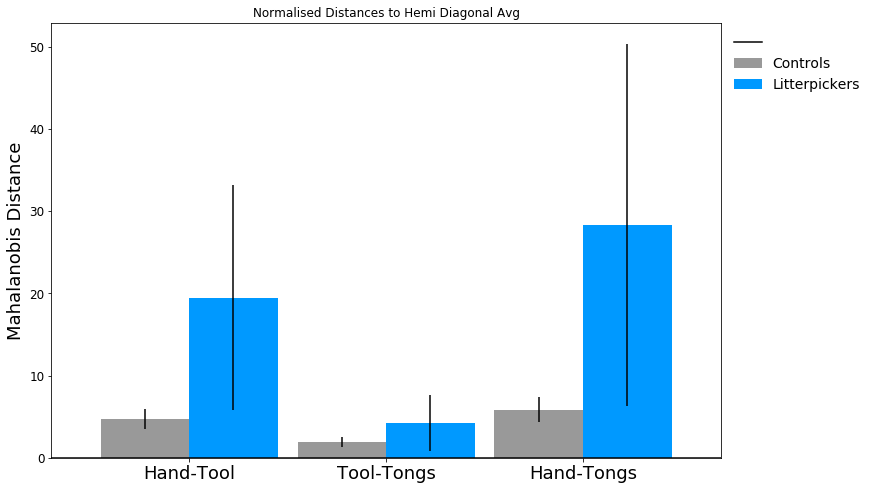

In [56]:
tool_index= ['hand-tool_norm','tool-tongs_norm','hand-tongs_norm']
color = [[.6,.6,.6],[0,.6,1]]

df.groupby('group')[tool_index].mean().T.plot.bar(yerr=df.groupby('group')[tool_index].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.title('Normalised Distances to Hemi Diagonal Avg')
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Hand-Tool','Tool-Tongs','Hand-Tongs'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Controls','Litterpickers'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
#plt.savefig('/vols/Data/soma/superusers/results/rsa_plots/LOTC_litterpicker_RSA.png', bbox_inches = "tight", dpi=1000)

([<matplotlib.axis.XTick at 0x1a20f8eeb8>,
 <a list of 2 Text xticklabel objects>)

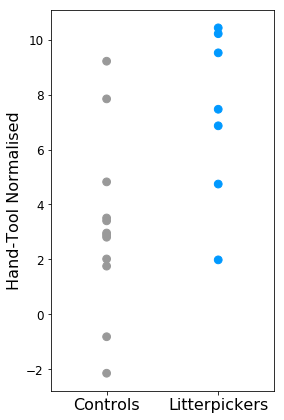

In [54]:
color2 = [[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],[.6,.6,.6],
          [0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1],[0,.6,1]]

df.plot(kind='scatter', x = 'group', y = 'R_hand-tool_norm', figsize=(4,7), fontsize=12, s=60, color=color2)
plt.xlabel('',fontweight='bold',fontsize=16)
plt.ylabel('Hand-Tool Normalised',fontsize=16)
#plt.ylim((1,4.2))
plt.xlim((-1,3))
plt.xticks([0,2],['Controls','Litterpickers'], fontsize=16)
#plt.savefig('LOTC/results/plots/hand-tool_scatter_top250hemi.png', bbox_inches = "tight", dpi=1000)

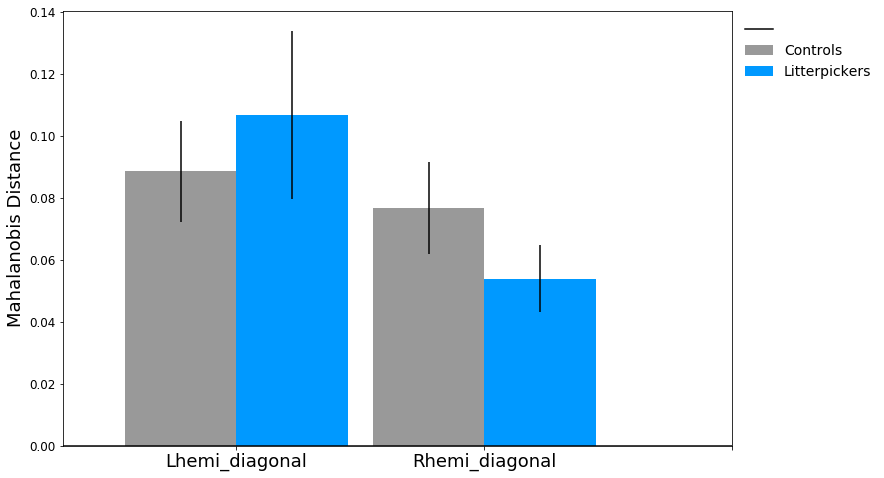

In [57]:
diagonal= ['L_diagonal','R_diagonal']
color = [[.6,.6,.6],[0,.6,1]]

df.groupby('group')[diagonal].mean().T.plot.bar(yerr=df.groupby('group')[diagonal].sem().T,figsize=(12,8),fontsize=12,width=.9,color=color)
plt.ylabel('Mahalanobis Distance',fontsize=18)
plt.xlabel('',fontweight='bold',fontsize=20)
plt.xticks([0,1,2],['Lhemi_diagonal','Rhemi_diagonal'],rotation='horizontal', fontsize=18)
plt.axhline(y=0, color='black', linestyle='-')
plt.legend(['','Controls','Litterpickers'],fontsize=14, loc='upper left',frameon=False, bbox_to_anchor=(1.0, 1.0))
#plt.savefig('/vols/Data/soma/superusers/results/rsa_plots/LOTC_litterpicker_RSA.png', bbox_inches = "tight", dpi=1000)